# El proceso de toma de decisiones


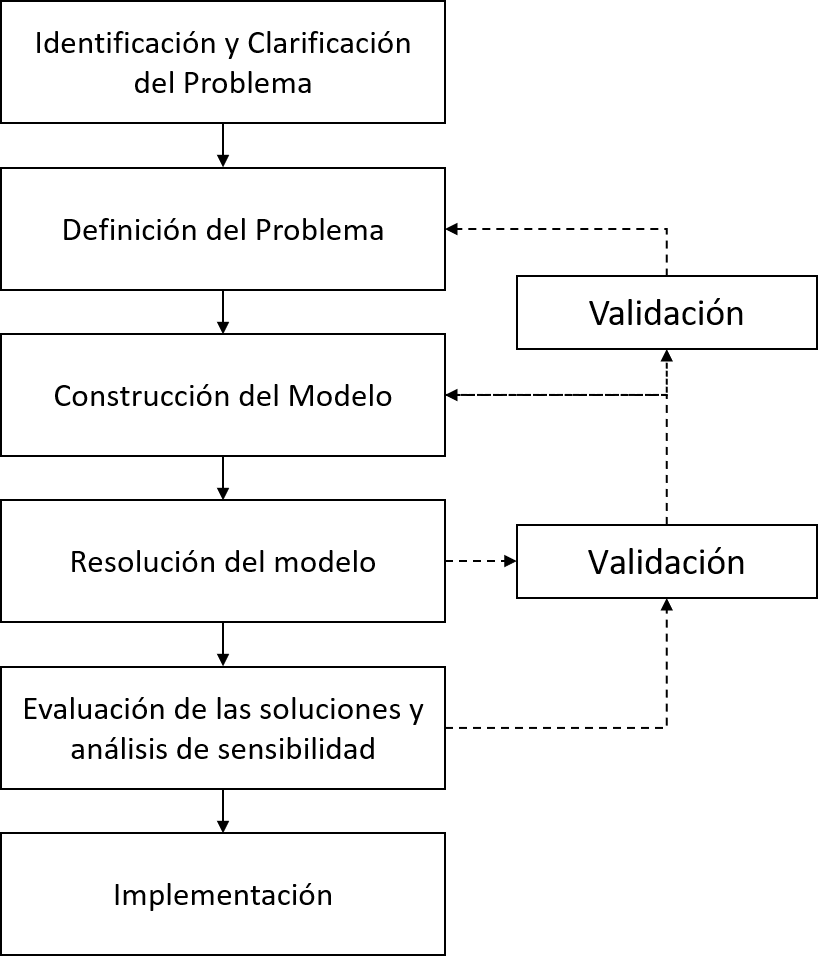

# Resolución de problema de optimización lineal

### Lenguajes algebráicos \& Mototores de optimización

![alt text](images/Architechture.png "Arquitectura")


# Instalación

## Librerías de modelamiento algebráico

para poder usar PuLP es necesario contar una instalación de este en nuestro ambiente de Python. Para esto, es posible simplemente ejecutar la siguiente línea de código que se encargará de la instalación. 

```python 

!pip install pulp


```

### Instalación de los paquetes necesarios de optimización

Si de desea usar un motor de optimización diferente a Cbc Solver, es posible lograrlo siguiendo las instrucciones del proveedor. Algunos otros softwares de optimización libres con buen rendimiento pueden ser instalados usando pip, como es el caso de HiGHS o GLPK.

```python 

!pip installhighspy


```

Para conocer los motores de optimización accesibles a través de PuLP podemos usar el comando list_solvers. Esta lista depende de la versión de PuLP y no trae realmentre lo que se encuentra instalado. Para filtrar solamente estos último debemos pasr el parámetro `onlyAvailable=True`.

In [4]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pulp as plp
plp.list_solvers(onlyAvailable=True)


['PULP_CBC_CMD']

# Caso MedicamentosX inc.

## Contexto

**MedicamentosX Inc**. es un laboratorio manufacturero de medicamentos que produce algunas soluciones para el tratamiento de una enfermedad. Las soluciones se produce a partir de dos ingredientes principales: **Ingrediente A** e **Ingrediente B**. 

Ambos ingredientes se diferencian en su composición química y en la cantidad de solución que pueden producir. Una unidad de  **Ingrediente A** produce 0.3 litros de **solución X**, 0.4 litros de **solución Y** y 0.2 de **solución Z**. Por su lado, una  unidad de  **Ingrediente B** produce 0.4 litros de **solución X**, 0.2 de **solución Y** y 0.3 de **solución Z**. 

Los ingredientes también difieren en precio y disponibilidad. **MedicamentosX Inc**. puede comprar **Ingrediente A** de un proveedor nacional a un precio de $\$20$ por unidad o **Ingrediente B** de un proveedor internacional a un precio de $\$15$ por unidad. 

La empresa necesita producir 2000 litros de  **solución X**, 1500 de **solución Y**   diarios  500  de  **solución Z*. Además, se sabe que el proveedor nacional cuenta con una disponibilidad de 9000 unidades mientras que el proveedor internacional cuenta solo con disponibilidad de proveer 6000.

¿Cómo se puede cumplir con estos requerimientos de manera más eficiente?


# Componentes de un problema de optimización

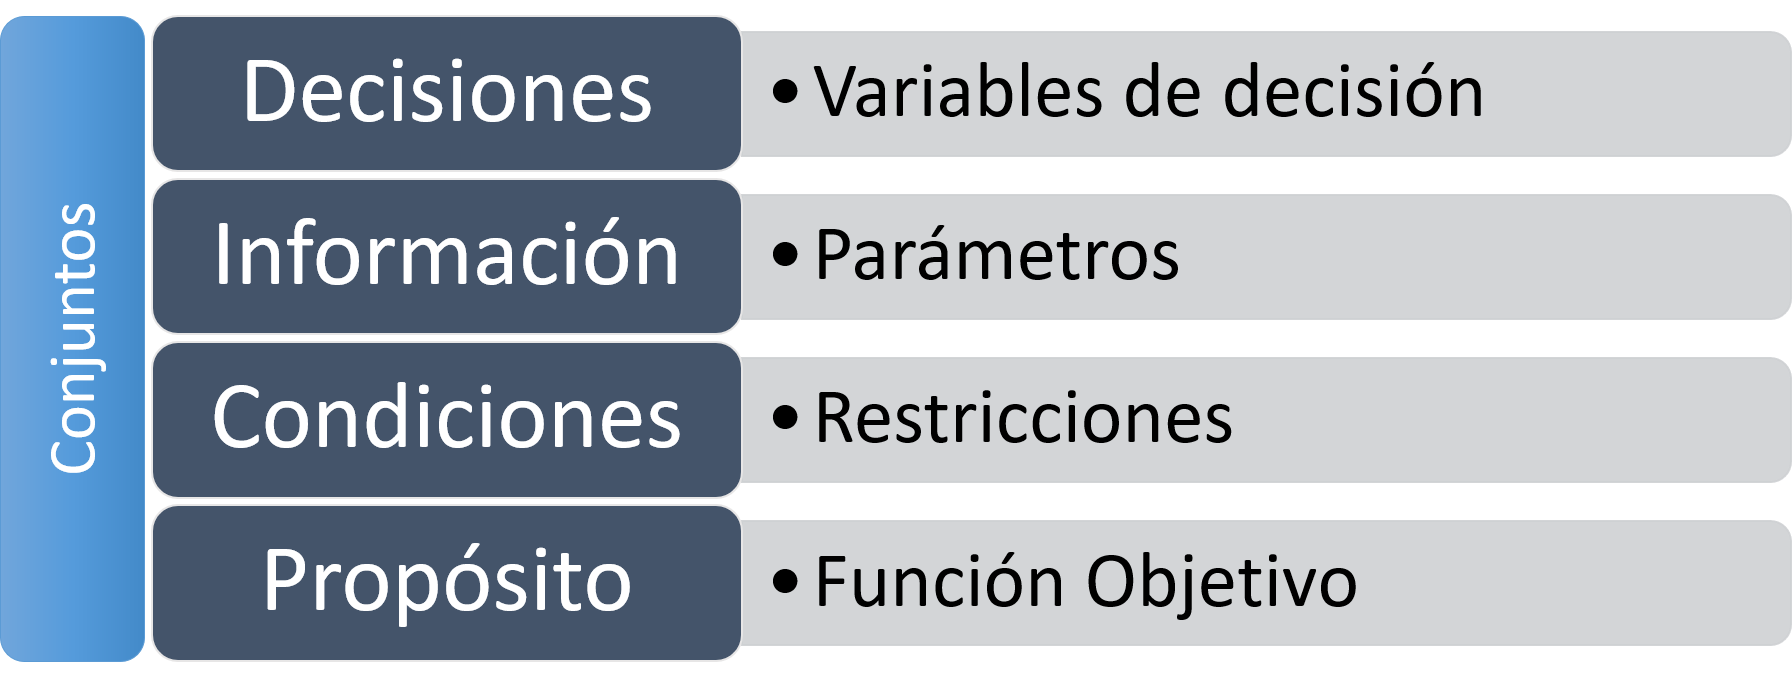

# Variables de decisión

### Qué debe decidirse?

En el caso de la fabricación de nuestro medicamento, se deben tomar decisiones respecto a:

1. La cantidad de ingrediente A a comprar y procesar con origen en el proveedor nacional.
2. La cantidad de ingrediente B a comprar y procesar con origen en el proveedor internacional.

# Información

### Con qué información cuenta la compañía para soportar su proceso de toma de decisiones?

A continuación presentamos la información que se tiene disponible para la fabricación del medicamento:

### Producción por unidad de materia prima

| Producto     | Nacional | Internacional |
|--------------|-------------|-------------|
| 1 | 0.3 unidades | 0.4 unidades |
| 2 | 0.4 unidades | 0.2 unidades |
| 3 | 0.2 unidades | 0.3 unidades |

### Producción requerida

| Producto   | Producción mínima requerida |
|------------|------------------------------|
| Producto X | 2000 unidades                |
| Producto Y | 1500 unidades                |
| Producto Z | 500 unidades                 |

### Costo y disponibilidad de la materia prima

| Proveedor | Precio por unidad | Capacidad de unidades |
|-----------|------------------|-----------------------|
| Nacional         | \$20              | 9000 unidades         |
| Internacional         | \$15              | 6000 unidades         |

# Condiciones

### ¿Qué especificaciones se deben cumplir?



1.   Las cantidades deben ser positivas
2.   Se debe satisfacer la demanda de **producto X**
3.   Se debe satisfacer la demanda de **producto Y**
4.   Se debe satisfacer la demanda de **producto Z**
5.   Se debe respetar la disponibilidad del proveedor nacional
6.   Se debe respetar la disponibilidad de  proveedor internacional


# Propósito

### ¿Cómo cuantificar el impacto de una decisión?

¿Cuál es el principal interés de **MedicamentosX**?

**Respuesta**

Minimizar los costos totales de compra de ingredientes.

### Represente el problema usando notación matemática


#### Conjuntos

1.   Proveedores : $\{Nacional, Internacional\}$
2.   Productos: $\{Producto_1, Producto_2,Producto_3\}$

#### Variables de decisión

1.   $x_A$ : Cantidad a comprar de crudo proveniente de Arabia
2.   $x_B$ : Cantidad a comprar de crudo proveniente de Venezuela

#### Restricciones

1.   $0.3x_A+0.4x_B \geq 2000$
2.   $0.4x_A+0.2x_B \geq 1500$
3.   $0.2x_A+0.3x_B \geq 500$
4.   $x_A \leq 9000$
5.   $x_B \leq 6000$
6.   $x_A \geq 0$
7.   $x_B \geq 0$

#### Función Objetivo

1.   $20x_A+15x_B $

# Construcción del modelo

### Representación explícita del modelo de optimización

In [6]:
#!pip install pulp
#!pip install cbcpy

En primer lugar instanciamos el `modelo` que operará como una hoja blanca que poco a poco registrará la información y parámetros del modelo que se quiere resolver.

In [7]:
import pulp as plp
import numpy as np

# Declaramos el problema
modelo_medicamentos=plp.LpProblem("MedicamentosX",plp.LpMinimize)



Después de haber declarado el modelo, es posible comenzar a crear las variables y restricciones que permitirán expresar el problema que se desea resolver.

In [8]:
# creamos las variables y asignamos su tipo (entero, continuo, binario)
x_a=plp.LpVariable("Nacional",0,None,plp.LpContinuous)
x_b=plp.LpVariable("Internacional",0,None,plp.LpContinuous)

La construcción de las variables es independiente del modelo, y solo a través de las restricciones o la función objetivo se creará una conexión entre estas.

### Función objetivo

In [9]:
# Declaramos la función objetivo
modelo_medicamentos+= 20*x_a+15*x_b, "Función Objetivo"

### Restricciones

In [10]:
modelo_medicamentos+= 0.3*x_a+0.4*x_b>=2000, "RequerimientoX"
modelo_medicamentos+= 0.4*x_a+0.2*x_b>=1500, "RequerimientoY"
modelo_medicamentos+= 0.2*x_a+0.3*x_b>=500, "RequerimientoZ"
modelo_medicamentos+=x_a<=9000, "Disponibilidad Nacional"
modelo_medicamentos+=x_b<=6000, "Disponibilidad Internacional"

### ¿cómo dar un vistazo al modelo que se está construyendo?

In [11]:
print(modelo_medicamentos)

MedicamentosX:
MINIMIZE
15*Internacional + 20*Nacional + 0
SUBJECT TO
RequerimientoX: 0.4 Internacional + 0.3 Nacional >= 2000

RequerimientoY: 0.2 Internacional + 0.4 Nacional >= 1500

RequerimientoZ: 0.3 Internacional + 0.2 Nacional >= 500

Disponibilidad_Nacional: Nacional <= 9000

Disponibilidad_Internacional: Internacional <= 6000

VARIABLES
Internacional Continuous
Nacional Continuous



### Optimizar

En este punto, tras haber construido el modelo, podemos pedir al optimizador que resuelva. Por defecto coin utilizará el solver  [Cbc solver](https://www.coin-or.org/Doxygen/Cbc/classCbcSolver.html) para buscar una solución óptima al problema.

In [12]:

# si queremos cambiar el sofwate de resolución modifcamos la siguiente línea
# también podemos pasar parámetros al solver, p.ejem. msg=0 para que no muestre mensajes durante la ejecución
solver=plp.PULP_CBC_CMD(msg=0)

# con esta damos solución al problema
modelo_medicamentos.solve()

#modelo_medicamentos.solve(solver)

1

In [13]:
for variable in modelo_medicamentos.variables():
    print("{} = {}".format(variable.name, variable.varValue))

Internacional = 3500.0
Nacional = 2000.0


# Construcción de modelos de gran escala de manera paramétrica

### Podemos separar los datos y el modelo. 

In [14]:
costs=[20,15]
coef=[[0.3,0.5],
      [0.4,0.2],
      [0.2,0.3]]
requirements=[2000,1500,500]
upper_bounds=[9000,6000]


###  y construir el modelo de forma paramétrica

In [15]:
modelo_medicamentos=plp.LpProblem("MedicamentosX",plp.LpMinimize)

x_a=plp.LpVariable("ProveedorA",0,None,plp.LpContinuous)
x_b=plp.LpVariable("ProveedorB",0,None,plp.LpContinuous)
x=np.array([x_a,x_b])
modelo_medicamentos.setObjective(plp.lpSum(np.dot(costs,x)))

i=0
# diccionariio de restricciones
ctr={}
for c in coef:
    ctr[i]=plp.LpConstraint(e=plp.lpSum(np.dot(c,x)),sense=plp.LpConstraintGE,rhs=requirements[i],name="Requerimiento"+str(i+1))
    modelo_medicamentos.addConstraint(ctr[i])
    i=i+1

for i in range(len(upper_bounds)):
    modelo_medicamentos+=x[i]<=upper_bounds[i], "Requerimiento"+str(i+6)    
modelo_medicamentos.solve()

1

### Es posible modificar una restricción y re-ejcutar

In [16]:
# modificamos una restricción
ctr[0].changeRHS(1500)
solver=plp.PULP_CBC_CMD(msg=0)
modelo_medicamentos.solve(solver)

1

#### O hacerlo de forma iterativa para evaluar el impacto de una restricción en la función objetivo

In [17]:
rhs_solucion_X=range(0,5000,100)
res=[]
x_vals=[]
for rhs in rhs_solucion_X:
    ctr[0].changeRHS(rhs)
    modelo_medicamentos.solve(solver)
    x_vals.append(rhs)
    res.append(modelo_medicamentos.objective.value())

    

Podemos usar algúno de los múltiples paquetes de visualización de Python para realizar un análisis de sensibilidad gráfico que nos permita entender el impacto del cambio de la restricción en el problema.

In [18]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_vals, y=res))
fig.show()

In [19]:
# Importar funciones para modelar de PuLP
import pulp as plp

# Crea una lista con los paises de origen
Origen = ['Nacional','Internacional']

# Crea un diccionario que vincula cada origen con la capacidad de produccion
Capacidad = {'Nacional': 9000,
             'Internacional':6000}

# Crea un diccionario que vincula cada origen con la capacidad de produccion
Costo = {'Nacional': 20,
         'Internacional': 15
          }

# Crea una lista con todos los productos
Bars = ["ProductoX","ProductoY","ProductoZ"]

# Crea un diccionario que vincula cada producto a la demanda que se dese satisfacer

Demanda = {"ProductoX":2000,
           'ProductoY':1500,
           'ProductoZ':500}
# 
p={
    ('Nacional',"ProductoX"):0.3,
    ('Nacional',"ProductoY"):0.4,
    ('Nacional', "ProductoZ"):0.2,
    ('Internacional',"ProductoX"):0.4,
    ('Internacional',"ProductoY"):0.2,
    ('Internacional', "ProductoZ"):0.3
}


# Crea un 'Modelo' que va a contener todos los componentes del problema, lo establece como un problema de minimización
Modelo = plp.LpProblem("2Crudes_Inc.",plp.LpMinimize)

#Declarar las variables que se usaran en la construcción del modelo
x=plp.LpVariable.dicts("x",Origen,0,None,plp.LpContinuous)

# El objetivo es 
Modelo += plp.lpSum([x[i]*Costo[i] for i in Origen]), "Costo total del plan"

for j in Bars:
    Modelo += plp.lpSum([x[i]*p[i,j] for i in Origen])>=Demanda[j], "Demanda de "+j

for i in Origen:
    Modelo += x[i]<=Capacidad[i], "Capacidad de "+i


# The problem is solved using PuLP's choice of Solver
Modelo.solve()

# The status of the solution is printed to the screen
print("Status:", plp.LpStatus[Modelo.status])

# Each of the variables is printed with it's resolved optimum value
for v in Modelo.variables():
    print(v.name, "=", v.varValue)

# The optimised objective function value is printed to the screen    
print("Costo total del plan = ", plp.value(Modelo.objective))

Status: Optimal
x_Internacional = 3500.0
x_Nacional = 2000.0
Costo total del plan =  92500.0
